# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [240]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

In [241]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
dataset = pd.read_json('dataset_es_dev.json', orient = 'records', lines=True)

In [243]:
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


<AxesSubplot:xlabel='count', ylabel='product_category'>

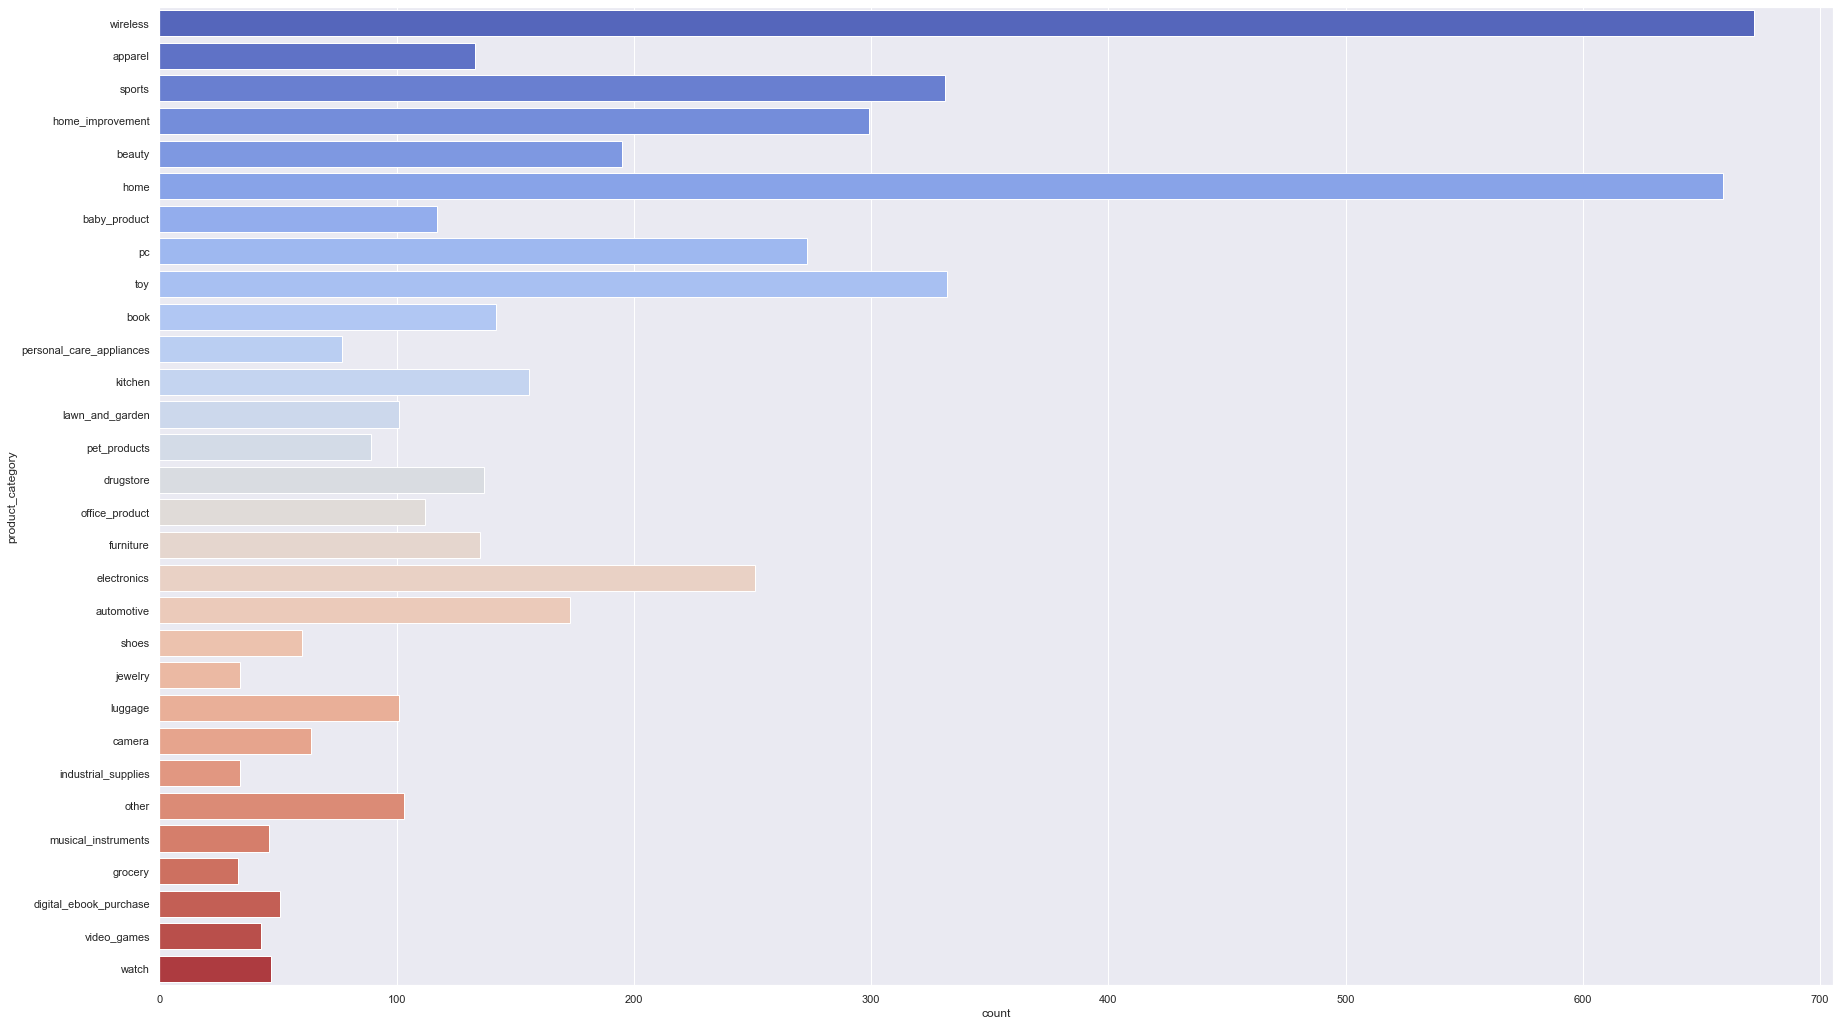

In [244]:
plt.figure(figsize=(30,18))
sns.countplot(data = dataset, y = "product_category", palette="coolwarm")


In [245]:
dataset.shape

(5000, 8)

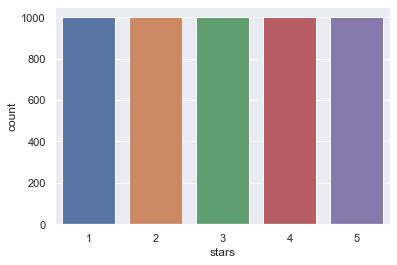

In [246]:
# Relizo un gráfico de recuento para las calificaciones que tiene el dataset. Son 1000 registros para cada estrella.
sns.countplot(data= dataset, x="stars")
plt.show()

In [247]:
# Miro al azar una review.
index_random = np.random.randint(1,5000)
titular = dataset.review_body.iloc[index_random]
print(index_random, titular)


1018 Nada más llegar he solicitado la devolución porque no es igual al de la foto. El unicornio que rota con la música es muy diferente del de la foto, bastante feo.


In [248]:
print(index_random, dataset.stars.iloc[index_random])


1018 2


### Tokenizar

In [249]:
index_random = np.random.randint(0,high = dataset.shape[0])
review = dataset.iloc[index_random].review_body
print(index_random, review)


863 Me duro 2 días antes de dañarse.


In [250]:
review_st= nltk.tokenize.word_tokenize(review)
review_st



['Me', 'duro', '2', 'días', 'antes', 'de', 'dañarse', '.']

In [251]:
stopwords = nltk.corpus.stopwords.words('spanish')
#stopwords = [palabra for palabra in stopwords if not in palabra]


In [252]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [253]:
review_wt_sin_sw= [word for word in review_st if word not in stopwords]
review_wt_sin_sw

['Me', 'duro', '2', 'días', 'dañarse', '.']

In [254]:
freq = nltk.FreqDist(review_wt_sin_sw)
freq

FreqDist({'Me': 1, 'duro': 1, '2': 1, 'días': 1, 'dañarse': 1, '.': 1})

## Normalización de la información

Antes de comenzar con el análisis es necesario procesar el texto para voverlo apto para la predicción. Importaré las librerias para stemmizar las palabras, es decir obtener sus raíces o reducir las formas flexivas de cada palabra a una base o raíz común. 

Los algoritmos de stemming funcionan cortando el final o el principio de la palabra, teniendo en cuenta una lista de prefijos y sufijos comunes que se pueden encontrar en una palabra flexionada. 

Elegiré esta opción por encima de la lematización, ya que desarrollar un stemmer es mucho más sencillo que construir un lematizador. En este último, se requieren mayores conocimientos lingüísticos para crear los diccionarios que permitan al algoritmo buscar la forma adecuada de la palabra.


  ### Stemmer

In [255]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#from nltk.stem import SnowballStemmer
#stemmer_spanish = SnowballStemmer('spanish')

In [292]:
# Recorremos todos los review y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]
simb=["!",".",",","no","si","...",")","("]
todas_palabras_list=[]
for review in dataset.Todojunto:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #review=re.sub("[^a-zA-Z]"," ",str(review))
    # Pasamos todo a minúsculas
    review=review.lower()
    # Tokenizamos para separar las palabras del review
    review=nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review = [stemmer.stem(palabra) for palabra in review]
    #review = [palabra for palabra in review]
    # Por ultimo volvemos a unir el titular
    todas_palabras_list.append(review)
    review = " ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list.append(review)
    


In [293]:
todas_palabras_list[0:10]

[['mala',
  'compra',
  'malisimo',
  'grand',
  'demasiado',
  'aparatoso',
  'mal',
  'protector',
  'pantalla'],
 ['recibido', 'recibido', 'pedido', 'devolución'],
 ['aprieta',
  'bien',
  'manillar',
  'buscar',
  'sistema',
  'funciona',
  'bien',
  'abrazadera',
  'lleva',
  'agarrar',
  'manillar',
  'aprieta',
  'bien',
  'deslizando',
  'linterna',
  'hacia',
  'abajo'],
 ['broca',
  'mantequilla',
  'utilicé',
  'broca',
  'menor',
  'diámetro',
  'doblaron',
  'varia',
  'mantequilla',
  'hacer',
  'mínima',
  'presión',
  'vez',
  'doblada',
  'intentar',
  'enderezarla',
  'parten',
  'exteriorment',
  'amarilla',
  'interior',
  'fundido',
  'gri',
  'peor',
  'compra',
  'hecho',
  'bastant',
  'tiempo'],
 ['gusta', 'gusta', 'olor', 'viejo', 'aspecto', 'malo'],
 ['bola',
  'rota',
  'hola',
  'despué',
  'recog',
  'paquet',
  'llegado',
  'bola',
  'rota'],
 ['part',
  'poder',
  'elegir',
  'color',
  'part',
  'poder',
  'elegir',
  'color',
  'envian',
  'cesto',
  '

In [294]:
flat_list = [item for t in todas_palabras_list for item in t]
flat_list[0:10]

['mala',
 'compra',
 'malisimo',
 'grand',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'recibido']

In [295]:
freq = nltk.FreqDist(flat_list)
freq

FreqDist({'bien': 1632, 'calidad': 1102, 'producto': 833, 'buena': 754, 'precio': 721, 'buen': 460, 'funciona': 364, 'bastant': 360, 'perfecto': 336, 'mejor': 314, ...})

In [296]:
review_list[0:5]

['mala compra malisimo grand demasiado aparatoso mal protector pantalla',
 'recibido recibido pedido devolución',
 'aprieta bien manillar buscar sistema funciona bien abrazadera lleva agarrar manillar aprieta bien deslizando linterna hacia abajo',
 'broca mantequilla utilicé broca menor diámetro doblaron varia mantequilla hacer mínima presión vez doblada intentar enderezarla parten exteriorment amarilla interior fundido gri peor compra hecho bastant tiempo',
 'gusta gusta olor viejo aspecto malo']

In [297]:
dataset["review_stem"] = review_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,Todojunto
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,guadalup encantado cesta llegado impecable.tie...,guadalupe Me ha encantado la cesta. Ha llegado...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,calidad precio desempeña función correctament,calidad precio Desempeña su función correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,excelent encantado diadema flore tal vienen im...,Excelente Me ha encantado la diadema! Las flor...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,genial gustan funda tpu funda normalment fina ...,"Genial A mi me gustan mucho las fundas TPU, ya..."
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,buena calidad artículo cumplido expectativa de...,Buena calidad El artículo ha cumplido con las ...


In [298]:
dataset["review_stem"] = review_list
dataset.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,review_stem,Todojunto
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,guadalup encantado cesta llegado impecable.tie...,guadalupe Me ha encantado la cesta. Ha llegado...
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,calidad precio desempeña función correctament,calidad precio Desempeña su función correctamente
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,excelent encantado diadema flore tal vienen im...,Excelente Me ha encantado la diadema! Las flor...
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,genial gustan funda tpu funda normalment fina ...,"Genial A mi me gustan mucho las fundas TPU, ya..."
4999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,buena calidad artículo cumplido expectativa de...,Buena calidad El artículo ha cumplido con las ...


In [299]:
df_freq = pd.DataFrame(list(freq.items()), columns = ["Word", "frecuency"])
df_freq.sort_values('frecuency',ascending=False, inplace = True)
df_freq.head(10)

,Word,frecuency
13,bien,1632
84,calidad,1102
93,producto,833
596,buena,754
89,precio,721
1277,buen,460
17,funciona,364
47,bastant,360
1627,perfecto,336
517,mejor,314


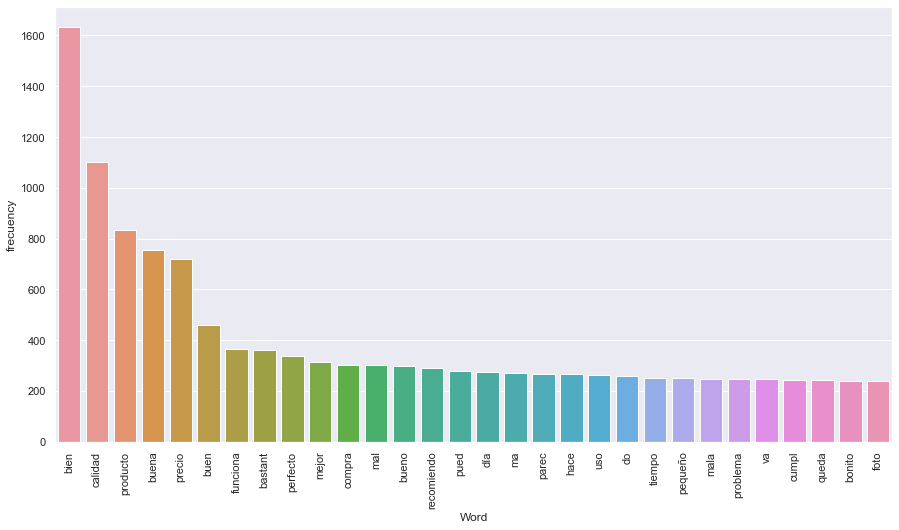

In [300]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_freq.iloc[:30].Word, y = df_freq.iloc[:30].frecuency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

### Vectorizacion

In [302]:
list_review_stem = list(dataset['Todojunto'].values)
Calification = dataset['stars'].values


In [303]:
list_review_stem[1]

'No lo he recibido No he recibido el pedido no la devolución'

In [304]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 10000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=10000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)


In [305]:
cou_vec

CountVectorizer(max_features=10000)

In [306]:
matriz_reviews = cou_vec.fit_transform(list_review_stem)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 primeras palabras
print("50 primeras palabras: ",all_words[0:50])


50 primeras palabras:  ['05', '10', '100', '1000', '100x100', '1080', '10cm', '10mm', '11', '12', '125', '12m', '12v', '12º', '13', '130', '135', '14', '15', '150', '150w', '150x190', '15h', '15min', '16', '160', '16gb', '17', '18', '180', '180gr', '18kg', '18º', '19', '1978', '1a', '1er', '1h', '1º', '20', '200', '2000', '20000', '2001', '2006', '2007', '200w', '2011', '2017', '2018']


In [307]:
print(all_words)

['05', '10', '100', '1000', '100x100', '1080', '10cm', '10mm', '11', '12', '125', '12m', '12v', '12º', '13', '130', '135', '14', '15', '150', '150w', '150x190', '15h', '15min', '16', '160', '16gb', '17', '18', '180', '180gr', '18kg', '18º', '19', '1978', '1a', '1er', '1h', '1º', '20', '200', '2000', '20000', '2001', '2006', '2007', '200w', '2011', '2017', '2018', '2019', '20ml', '21', '22', '23', '230', '24', '240', '24h', '25', '25cm', '26', '27', '28', '29', '2ds', '2g', '2h', '2horas', '2kg', '2m', '2meses', '2mm', '2s', '2º', '30', '300', '3000', '300mm', '300w', '303', '30l', '30w', '32', '3200', '33', '35', '36', '360', '37', '38', '380', '3900', '3años', '3b', '3d', '3x1', '40', '40e', '41', '43', '44', '45', '48', '49', '4g', '4gb', '4ghz', '4h', '4k', '4x', '50', '500', '5000', '500g', '5400', '5400rpm', '55', '5a', '5c', '5cm', '5ghz', '5l', '5meses', '5t', '5x', '5ª', '60', '64', '64gb', '65', '65cm', '68', '69', '6cm', '6d', '6l', '6mm', '6s', '6x', '70', '70m2', '70mm', '7

In [308]:
type(all_words)

list

### Modelar

In [312]:
x = matriz_reviews
y = Calification
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [313]:
len(Calification)

5000

In [314]:
matriz_reviews.shape

(5000, 10000)

In [315]:
len(ytrain)

4000

### Random Forest Classifier

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth=7)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.463


In [356]:
print("acc: ",rf.score(xtrain,ytrain))

acc:  0.64175


In [318]:
xtrain.shape

(4000, 10000)

In [357]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1", "2", "3", "4", "5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return


In [358]:
y_pred=rf.predict(xtest)


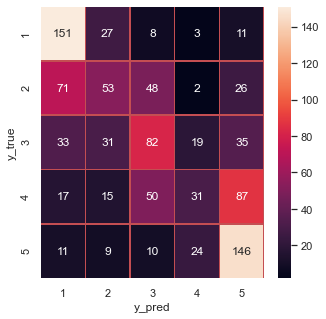

In [359]:
confusion(ytest,y_pred)

La matriz indica que el modelo predice bien los valores extremos (1 y 5) mientras que en los valores intermedios (2 y 4) presenta dificultades. 
Además, el modelo muestra gran diferencia entre Train y Test, mostrando indicios de Overfitting, ya que el modelo muestra buen desempeño con los datos de entrenamiento pero tiene problemas para predecir con nuevos datos. 

### Random Forest Regressor

In [326]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sklearn.metrics as metrics

In [327]:
clf_tree = RandomForestRegressor(n_estimators=3500, max_features=5000,n_jobs=-1, random_state = 0, criterion="mse")
clf_tree.fit(xtrain,ytrain)

RandomForestRegressor(max_features=5000, n_estimators=3500, n_jobs=-1,
                      random_state=0)

In [329]:
y_train_pred_clf = clf_tree.predict(xtrain)
y_test_pred_clf = clf_tree.predict(xtest)

In [330]:
print('RMSE para Train', np.sqrt(metrics.mean_squared_error(ytrain, y_train_pred_clf)))
print('RMSE para Test', np.sqrt(metrics.mean_squared_error(ytest, y_test_pred_clf)))

RMSE para Train 0.3811069523942922
RMSE para Test 1.0617131717278487


In [331]:
comparacion_tree_reg = pd.DataFrame({'Real Values':ytest, 'Predicted Values':y_test_pred_clf})
comparacion_tree_reg

,Real Values,Predicted Values
0,2,1.233714
1,4,2.314571
2,1,1.659143
3,3,3.010000
4,3,3.099429
...,...,...
995,2,3.135714
996,1,2.324286
997,1,1.748857
998,3,2.992000


### SVM

In [348]:
from sklearn.svm import SVC
model = SVC(gamma= 0.1)
model.fit(xtrain,ytrain)

SVC(gamma=0.1)

In [346]:
print("acc: ", model.score(xtest,ytest))

acc:  0.397


In [349]:
print("acc: ", model.score(xtrain,ytrain))

acc:  0.97825


### Regresión Lineal Simple

In [334]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [335]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [336]:
ytrain_pred =reg.predict(xtrain)
ytest_pred = reg.predict(xtest)


In [337]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(ytrain, ytrain_pred))
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 0.0005812125136230803
Raíz del error cuadrático medio en Test: 9.936089712158822


In [343]:
comparacion_lr = pd.DataFrame({'Real Values':ytest, 'Predicted Values':ytest_pred})
comparacion_lr

,Real Values,Predicted Values
0,2,3.178111
1,4,7.391595
2,1,0.604430
3,3,8.582116
4,3,2.508703
...,...,...
995,2,17.081931
996,1,7.813666
997,1,1.190371
998,3,11.075766


C:\Users\juanl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juanl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


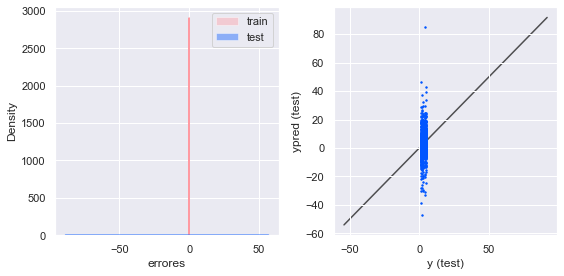

In [339]:
plt.figure(figsize = (8,4), clear=True,)

plt.subplot(1,2,1)
sns.distplot(ytrain - ytrain_pred, bins = 40, label = 'train',color="#FF9AA2")
sns.distplot(ytest - ytest_pred, bins = 40, label = 'test', color="#0055FF")
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(ytest,ytest_pred, s =2, c="#0055FF")
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),  
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('ypred (test)')
    
plt.tight_layout()
plt.show()

### Grid Search para Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = clf_tree
para_grids = {
            "n_estimators" : [ 500,1000,1500,2000, 3000, 5000],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False] ,
             "min_samples_split" : [2,4,8,10],
        }


clf_tree_grid = GridSearchCV(estimator, para_grids, scoring="neg_mean_squared_error")
clf_tree_grid.fit(xtrain, ytrain)
forest_be = clf_tree_grid.best_estimator_

In [ ]:
print("Mejores parametros: "+str(clf_tree_grid.best_params_))
print("Mejor Score: "+str(clf_tree_grid.best_score_)+'\n')

scores = pd.DataFrame(clf_tree_grid.cv_results_)
scores